In [ ]:
import urllib.request
import zipfile
import os

try:
    os.mkdir("files")
except:
    pass

with urllib.request.urlopen('https://courses.cs.tau.ac.il/pyProg/2425a/resources/notebook_resources.zip') as f:
    content = f.read()

with open('files/notebook_resources.zip', 'wb') as f:
    f.write(content)

with zipfile.ZipFile('files/notebook_resources.zip', 'r') as zip_ref:
    zip_ref.extractall('files')

print(os.listdir('files'))

# Libraries: Pandas (two weeks)

## Python Programming for Engineers
### Tel-Aviv University / 0509-1820 / Fall 2025-2026

## Today's agenda

### What's Pandas?

- Pandas is a **library** for analysing and processing **tabular** data.
    - reminder: **library**: an extension of Python that contains additional classes, functions, etc.
- Pandas is **open-source**, meaning its code is available to see for all<br>
- Pandas is built on top of Numpy.

## Today's agenda - Pandas
- Introduction
- Tabular data representation as `DataFrame` objects
- `DataFrame` creation
- `DataFrame` manipulations
- Adding, deleting and changing **rows**
-  Adding, deleting and changing **columns**
-  Combining `DataFrame`'s
-  Perform calculations on `DataFrame`
-  groupby` operation`


### Import and usage


Reminder:
```python
import numpy as np
```

- Make sure you `import` the packages you need at the beginning of your program
- Pandas alias (shortage): `pd` (same as `np` for Numpy)
- Use `pd` instead of the full name **pandas**

In [ ]:
import pandas as pd

## Pandas' `DataFrame` class

Pandas main class is a **tabular** data structure called `DataFrame`
- DataFrame comprises rows and columns
- Rows and columns are of type `Series`
- Rows and columns have indices
    - By default, row indices are sequence of number starting from 0
    - Column indices are the header of the table

Table dimensions (axes):    
- Two-dimensions: rows (axis 0) and columns (axis 1).
- The values of each column are of the **same (d)type**.
- As in Numpy, dimensions are called axes.
    - Typically, we operate along the axes

### `DataFrame` from dictionary

In [ ]:
ages_by_name = {'Name': ['Rick', 'Morty'], 'Age': [70, 14]}
df = pd.DataFrame(data=ages_by_name)
display(df)

### `DataFrame` from Numpy matrix

In [ ]:
import numpy as np

In [ ]:
df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['a', 'b', 'c'])
display(df)

### `DataFrame` from file

#### Reminder - CSV files
- CSV: **C**omma **S**eperated **V**alues
- CSV files contain data in a tabular format using comma to separate between values
    - Each row is seperated by a line break (\n)
    - Each value in columns is seperated by a comma (,)
    - e.g.,      
        
        Name,Programming,Marine Biology,Stellar Cartography    
        Yael,50,56,70    
        Nadav,61,77,75    
   
        <table align=left><tr><td>Name</td><td>Programming</td><td>Marine Biology</td><td>Stellar Cartography</td></tr>
               <tr><td>Yael</td><td>50</td><td>56</td><td>70</td></tr>
               <tr><td>Nadav</td><td>61</td><td>77</td><td>75</td></tr>
        </table>

### Opening a CSV file: `files/StudentsGrades.csv`

<table>
    <tr><td>Using a simple text editor
        
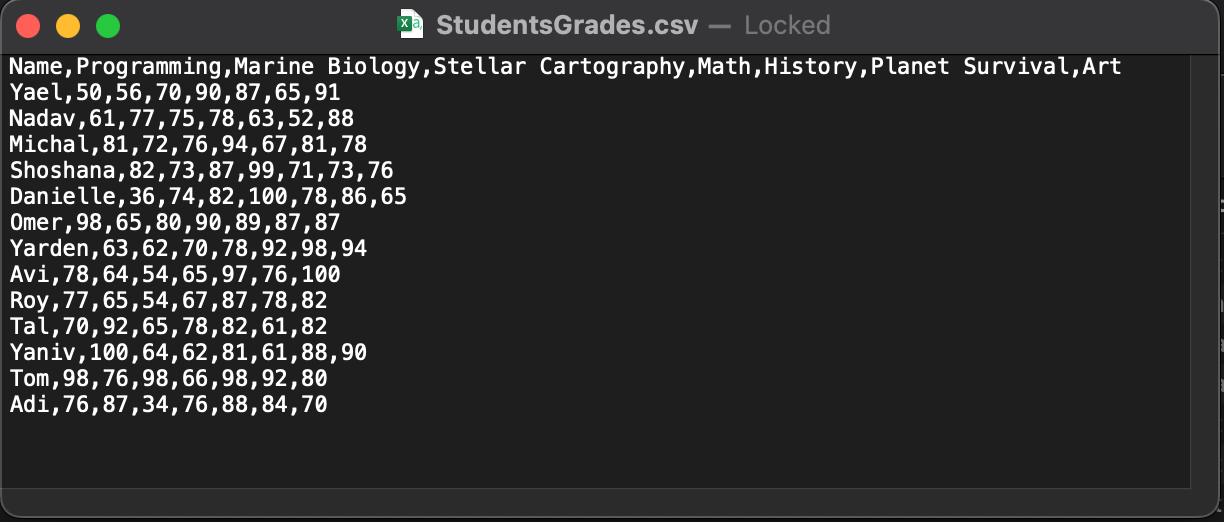
        </td>
    <td>Using Microsoft Excel:    
       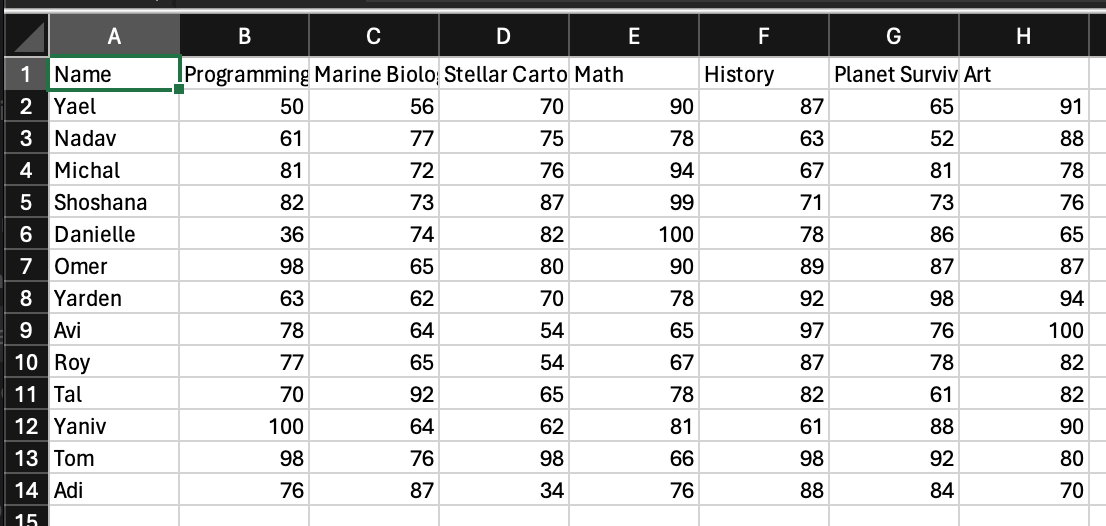
        </td>
    </tr>
</table>

- Following examples will be demonstrated using CSV files
    - make sure you have this file by executing the the first code block in this notebook


### Loading a CSV file as a `DataFrame` object


In [ ]:
inputFileName = "files/StudentsGrades.csv"
df = pd.read_csv(inputFileName)
display(df)

### General description of `DataFrame` object

In [ ]:
print(len(df)) # num of rows (excluding the header)

In [ ]:
print(df.dtypes)

Note that 'object' dtype represents also strings

### Fetching rows and columns

#### `[]`, `iloc[,]` and `loc[,]`

- `df[x]`: Fetching data by column names (x)
- `df.loc[x,y]`:  Fetching data by row name(s) (x) and column name(s) (y)
- `df.iloc[x,y]`: Fetching data by row position(s) (x) and column position(s) (y)

#### <span style='color:red'> Do not get confused between `df[]`, `df.loc[]` and `df.iloc[]`!</span>

### Fetching rows and columns: data types

- Fetching a single row **and** a single column yields an object of y column (d)type
- Fetching a single row **or** a single column yields a `Series` object
- Fetching multiple rows **and** columns yields a `DataFrame` object

You can think about the class `Series` as one-dimensional vector, and `DataFrame` as two-dimensional matrix.

### Fetching rows and columns: `DataFrame` example

In [ ]:
df_first3=df.iloc[0:3,0:3]
print(type(df_first3))
display(df_first3)

In [ ]:
print(df_first3.iloc[0])
print(df_first3.iloc[:,0])

### Fetching rows and columns: `Series` example

In [ ]:
df_first1=df.iloc[0,0:3]
print(type(df_first1))
display(df_first1)

In [ ]:
print(df_first1.iloc[0])
print(df_first1.iloc[:,0])

### `iloc`  vs. `loc` 

Objective #1: Create a `DataFrame` (`df_partial`) that contains the first, third and fifth lines in `df` 

In [ ]:
# option 1 
x=[1,3,5]
df_partial = df.iloc[x] 
# option 2 
df_partial= df.iloc[[1,3,5]]  
# option 3
df_partial= df.iloc[1:7:2]

In [ ]:
print(type(df_partial))
display(df_partial)

Objective #2: Fetch the last line from `df_partial`

In [ ]:
display(df_partial)

In [ ]:
# option 1 
s_last=df_partial.iloc[2]
# option 2
s_last=df_partial.iloc[-1]
print(type(s_last))
display(s_last)

In [ ]:
print(df_partial.loc[2])

### Why did we get an error?
- The `loc` method access rows by their index
- The `iloc` method access rows by their position

In [ ]:
display(df_partial)
print(df_partial.loc[5] == df_partial.iloc[2])

###  Rows and column names : `DataFrame`

- The attribute of row names in `DataFrame` is called **index**
- The attribute of column names in `DataFrame` is called **columns**
- Both are of class `Index`  

You can think about the class `Index` as general naming class, and the attributes `df.index` `df.columns` as instances that represents row names columns names, respectively.

In [ ]:
df.index 

In [ ]:
df.columns

###  Cell names in `Series`

The cell names in a `Series` is also called **index**, regardless whether it came form a column or a row.

In [ ]:
s=df.iloc[0]
print(type(s))
s.index

## Manipulations on `DataFrame`

### Column operations

Fetch Math column

In [ ]:
print(df['Math'])

In [ ]:
print(type(df['Math']))

Subtract Art grades from Math grades

In [ ]:
print(df['Math'] - df['Art'])

Average Art and Math grades

In [ ]:
print((df['Math'] + df['Art'])/2)

Average grades of all classes

In [ ]:
df.iloc[:,1:].mean(axis=1)

Add the average of all classes for each student (adding an average column)

In [ ]:
df['Avg'] = df.iloc[:,1:].mean(axis=1)
display(df)

### Add a new row
- In order to add a new student (Dana) to our data frame
    - Create a single row data frame with Dana's grades
    - Concatenate the two data frames

In [ ]:
inputFileName = "files/StudentsGrades.csv"
df = pd.read_csv(inputFileName)
df

In [ ]:
new_student = [{'Name':"Dana",'Programming':76.0,'Marine Biology':65.0,'Stellar Cartography':98.0,'Math':8.07,
                'History':65.0,'Planet Survival':89.0,'Art':100.0}]
pd.DataFrame(new_student)
df = pd.concat((df, pd.DataFrame(new_student)), ignore_index=True)
display(df)


But what about the index of Dana?

In [ ]:
inputFileName = "files/StudentsGrades.csv"
df = pd.read_csv(inputFileName) 

In [ ]:
new_student = [{'Name':"Dana",'Programming':76.0,'Marine Biology':65.0,'Stellar Cartography':98.0,'Math':8.07,
                'History':65.0,'Planet Survival':89.0,'Art':100.0}]
df = pd.concat([df, pd.DataFrame(new_student)], ignore_index=True) # ignores the original indices
display(df)

We will see a more general usage of ```concat``` later

### Delete a column

In [ ]:
df_without_names = df.drop('Name', axis=1) # axis=1 --> columns are dropped
display(df_without_names)

### Delete a row
- Remove rows based on index

In [ ]:
display(df.drop(10))  # by default, axis=0 --> rows are dropped

In [ ]:
display(df.drop([0,3,10]))

- Remove rows based on condition?
    - For example: remove all the students named "Nadav"

### Reminder: masking

Numpy:
- Generate a boolean matrix (`ndarray`) of the same the same dimensions as a given matrix
     - e.g., by applying a condition on the original matrix
- This boolean matrix is then used to filter the original matrix

Pandas:
- Generate a boolean `Series` of the same the same length as the columns/rows of the `DataFrame`
- This boolean `Series` is then used to filter the `DataFrame`

### Masking in Pandas

In [ ]:
df['Name'] != 'Nadav' # the condition

In [ ]:
msk=df['Name'] != 'Nadav'
print(type(msk))
print(msk.dtype)

### Masking: before and after

In [ ]:
display(df)

In [ ]:
display(df[msk]) # Using the condition to filter the DataFrame

### Other masking filters

In [ ]:
display(df[df['Name'] != 'Nadav']) # Typically wriiten as a one-liner

In [ ]:
display(df[df['Programming'] > 80])

### Changing specific values of a column by masking

- We wish to give a passing grade to all students in Programming

In [ ]:
df.loc[df["Programming"] < 60, "Programming"] = 60
display(df)

### Creating a new column by applying a custom function on each row

In [ ]:
display(df.apply(lambda row: row['Name'].upper(),axis=1)) # Note the axis=1!

df=df.iloc[:,:-1]
df

### Creating a new row by applying a custom function on each column

In [ ]:
display(df.drop('Name',axis=1).apply(lambda col: col + (100.0 - max(col)), axis=0))  # Note the axis=0!

### Combining two `DataFrame` objects into one

- When the two data frames have the same set of columns - we use ```concat``` (remember?)

In [ ]:
inputFileName = "files/StudentsGrades.csv"
df = pd.read_csv(inputFileName)
df=df.head(3) # For simplicity, we take only the first three rows of the table
display(df)

In [ ]:
lst_staff = \
        [{'Name':"Shahar",'Programming':45.0,'Marine Biology':15.0,'Stellar Cartography':87.0,'Math':81.0,
          'History':100.0,'Planet Survival':82.0,'Art':24.0},
         {'Name':"Hagai",'Programming':100.0,'Marine Biology':62.0,'Stellar Cartography':78.0,'Math':10.0,
          'History':62.0,'Planet Survival':69.0,'Art':100.0},
         {'Name':"Inbal",'Programming':100.0,'Marine Biology':25.0,'Stellar Cartography':84.0,'Math':100.0,
          'History':95.0,'Planet Survival':99.0,'Art':30.0}]
df_staff = pd.DataFrame(lst_staff)
display(df_staff)

In [ ]:
df_with_staff = pd.concat([df, df_staff], ignore_index=True) # ignores the original indices to avoid duplicated indices

In [ ]:
display(df_with_staff)

### Combining `DataFrame` objects

- When the two data frames have **different** set of columns, what happens?

In [ ]:
lst_staff_grades_from_technion = \
        [{'Name':"Shahar", 'Machine Learning':96.0,'Spanish':100.0,'Karting':100.0, 'Yoga': 97.0},
         {'Name':"Hagai", 'Machine Learning':98.0,'Spanish':65.0,'Karting':87.0, 'Yoga': 100.0},
         {'Name':"Inbal", 'Machine Learning':100.0,'Spanish':92.0,'Karting':95.0, 'Yoga': 86.0},
         {'Name':"Rotem", 'Machine Learning':80.0,'Spanish':100.0,'Karting':100.0, 'Yoga': 100.0},
        ]
df_staff_from_technion = pd.DataFrame(lst_staff_grades_from_technion)

In [ ]:
display(df_staff_from_technion)
display(df_with_staff)

In [ ]:
df_after_concat = pd.concat([df_with_staff, df_staff_from_technion], ignore_index=True)
display(df_after_concat)

Any issues?

### Combining `DataFrame` objects

- Add new rows instead of match by name
- NaN: Not a number (Also relevant for non-numeric missing values)

### `concat`  by columns (axis=1)

In [ ]:
df_after_concat = pd.concat([df_with_staff, df_staff_from_technion], axis=1)
display(df_after_concat)

Any issues?

- Wrong match again: by row index


### `concat`  by columns (axis=1): changing the indices

In [ ]:
df_with_staff.index=list(df_with_staff['Name'])
df_staff_from_technion.index=list(df_staff_from_technion['Name'])
display(pd.concat([df_with_staff, df_staff_from_technion], axis=1))

- Still have a redundant "Name" column
- What if we need to match by another column (e.g., last name)

### `merge` function

- Joining two table by crossing their column values
    - `how='inner/outer'` for intersection/union
    - `on='x'/['x','y']` joining rows that are matched on column 'x' / ('x' **and** 'y')

In [ ]:
df_staff_from_technion = pd.DataFrame(lst_staff_grades_from_technion)
df_after_merge_inner = pd.merge(df_with_staff, df_staff_from_technion, on='Name', how = 'inner')

In [ ]:
display(df_after_merge_inner)

#### Who did we lose?

In [ ]:
df_after_merge_outer = pd.merge(df_with_staff, df_staff_from_technion, on='Name', how = 'outer')

In [ ]:
display(df_after_merge_outer)

- How to treat NaN? in the recitation

## Data analysis

In [ ]:
inputFileName = "files/StudentsGrades.csv"
df = pd.read_csv(inputFileName)  

### Total number of fails - per course

In [ ]:
df_no_names = df.drop('Name', axis=1)
print(df_no_names[df_no_names < 60].count())

### Total number of fails - per student

In [ ]:
df_no_names = df.drop('Name', axis=1)
print(df_no_names[df_no_names < 60].count(axis=1))

In [ ]:
print(df_no_names[df_no_names < 60].count().sum())

In [ ]:
print(df_no_names[df_no_names < 60].count(axis=1).sum())

### Number of fails per student - with names

In [ ]:
for index, row in df.iterrows():
    row_without_name = row.drop('Name')
    print(row["Name"],row_without_name[row_without_name < 60].count())

#### A better solution

In [ ]:
display(df.apply(lambda row: pd.Series([row["Name"], row.drop("Name")[row.drop("Name") < 60].count()]) ,axis=1))

### Get the name of the student with the highest average grade


In [ ]:
df['Avg'] = df.iloc[:,1:].mean(axis=1)
max_id = df['Avg'].idxmax()
print(max_id)

In [ ]:
print(df.loc[max_id]["Name"])

### <span style='color:red'>`idxmax` always comes `loc`, if we want a row with the max index</span>

### Get the name of the course with the highest average grade

In [ ]:
print(df.drop('Name', axis=1).mean(axis=0).idxmax())

<span style='color:red'>Since we are dealing with columns, the input for `.drop` is the column name (and axis=1)</span>

### Get all students who have failed in Marine Biology or Stellar Cartography

In [ ]:
print((df['Marine Biology'] < 60))

In [ ]:
print((df['Stellar Cartography'] < 60))

In [ ]:
print(((df['Marine Biology'] < 60) | (df['Stellar Cartography'] < 60)))

In [ ]:
df_fail = df.loc[(df['Marine Biology'] < 60) | (df['Stellar Cartography'] < 60)]
print(df_fail["Name"])

### Get all students who have aced both Math and Art

In [ ]:
df_ace = df.loc[(df['Art'] >= 90) & (df['Math'] >= 90)]
print(df_ace["Name"])

## `groupby` - aggregating groups of rows

First, let's add to our table new columns called "Degree"

In [ ]:
inputFileName = "files/StudentsGrades.csv"
df = pd.read_csv(inputFileName)
df['Degree']=["Industrial", "Industrial", "mechanical", \
              "Industrial", "Industrial", "electrical", \
              "electrical", "electrical", "electrical", \
              "bio-medical", "bio-medical", "mechanical", "mechanical"]
display(df)

### `groupby` syntax

 ####  df.<span style='color:red'>groupby(x)</span><span style='color:blue'>[y]</span>.<span style='color:green'>op()</span>

- <span style='color:red'>Splitting the `DataFrame` into groups (sub-table of type `DataFrame`) according to values of some column(s) `x`</span>
- <span style='color:blue'>Select the relevant column(s). e.g., `y`</span>
- <span style='color:green'>Aggregate the values of each column in a sub-table into a single value using the relevant operator/function (`op`). e.g., `mean()`,`max()`,`min()`,`sum()`,`count()`,`apply()`</span>

Note that `x` and `y` are single columns (type `str`) or multiple ones (list of `str`s)

In [ ]:
df.groupby(["Degree"])['Programming'].mean()

### Use `groupby` to find the maximal/minimal value in each category (e.g., Degree)

1. Extracting the maximal/minimal index in each category using idxmax()/idxmin() operator

In [ ]:
df.groupby(["Degree"])['Programming'].idxmax()

2. Extract the rows of the original rows corresponding to those indices

In [ ]:
df.loc[df.groupby(["Degree"])['Programming'].idxmax()]

## Data visualization

Motivation - we want to visualize our data in a way that convey the main point that stems from the data

- e.g., show difference between two large groups of numbers

- There are several libraries that can help us drawing figures. e.g., `matplotlib`, `seaborn` etc.
- In this course, we will see examples of plotting out data using `matplotlib`

#### Import matplotlib library

In [ ]:
import matplotlib.pyplot as plt

#### Code template for drawing a figure

```python
fig, ax = plt.subplots() ## Create canvas. figsize=(4,3) sets the size of the figure (optional)
## Draw your plot here
plt.legend() # plot the names that each color represents (optional)
plt.show() # Visualize plot
```

### Objective: visualize Programming and Math

#### Curves of Programming and Math

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))
columns = ['Programming', 'Math', 'Art'] 
ax.plot(df.loc[:,columns], label=columns)
plt.legend()
plt.show()

#### Caveat
- Curves are designed to describe the link between two **ordered** variables -no order between students 
- The link between variables is mandatory - no way to plot this figure w/o with grade of different students in each class or with NaN values (NaN row will be dropped)

#### Boxplot of Programming and Math grades

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))
columns = ['Programming', 'Math']
ax.boxplot(df.loc[:,columns], labels=columns) # Orange lines are the medians
plt.show()

- Pro: the differences between sets are clear
- Con: less appropriate for counting (e.g., how many students has grade > 85)

#### Plot bars of number of student that pass 85

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))
columns = ['Programming', 'Math'] 
ax.bar(columns, (df.loc[:,columns]>85).sum())
plt.show()

## Questions from previous exams

[Exam 2024 semester B Moed A](https://courses.cs.tau.ac.il/pyProg/2425a/exams/exam2324b_moedA.pdf)

E.

In [ ]:
def read_in_range(start_month,start_year,end_month,end_year):
    cur_month=start_month
    cur_year=start_year
    dfs=[]
    while cur_year < end_year or (cur_year == end_year and cur_month <= end_month):
        dfs.append(pd.read_csv("files/orders_"+str(cur_month)+"_"+str(cur_year)+".csv")) # The "files/" prefix in the path is due to technical reasons, and should be ignored.
        cur_month+=1
        if cur_month>12:
            cur_year+=1
            cur_month=1
    return pd.concat(dfs, ignore_index=True)

Read products and order tables

In [ ]:
df_p=pd.read_csv("files/products2.csv") # The "files/" prefix in the path is due to technical reasons, and should be ignored.
df_o=read_in_range(2,2024,4,2024)

F.

In [ ]:
display(df_o)
df_o.fillna(df_o.median(),inplace=True)
display(df_o)

G.

In [ ]:
df_p.index=df_p['Name'] # First line is missing
df_join=pd.concat((df_p,df_o.T), axis=1)
df_join

H.

In [ ]:
profit=df_join.iloc[:,4:].sum(axis=1)*( df_join['Price']- df_join['Cost']) # "axis of sum should be 1"
profit

I.

In [ ]:
df_p['Gain']=df_o.sum()*(df_p['Price']-df_p['Cost'])
df_p.groupby('Vendor')['Gain'].sum().idxmin()

### Common pandas functions

| categoy  | name  | use |
|:--------:|:-----|:---|
|**Creation**| | |
| |[pd.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)|create a new dataframe from numpy array/dictionary. Can provide row and column names|
| |[pd.Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html)|create a new Series object from numpy array/dictionary. Can provide names|
| |[pd.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)|read a dataframe from csv file|
| |[df.to_csv](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)|write a dataframe to a csv file|
|**Basic information**| | |
| |[df.info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)|print a summary of the dataframe: column names, dtypes, number of existing (non Na) values, etc.|
| |[df.head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)|return the first rows of a dataframe|
| |[df.tail](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html)|return the last rows of a dataframe|
| |[df.sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)|return the random rows from a dataframe|

### Common pandas functions (cond.)

| categoy  | name  | use |
|:--------:|:-----|:---|
|**Data access**| | |
| |[df.index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html)|get row labels of dataframe|
| |[df.columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)|get column labels of dataframe|
| |[df.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)|get dataframe subset by labels|
| |[df.iloc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html)|get dataframe subset by position|
|**Manipulation**| | |
| |[df.drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)|remove rows or columns by label name|
| |[df.apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)|apply a function on all rows/columns of a dataframe|
| |[df.map](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)|apply a function on all values in a dataframe|
| |[df.sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)|sort table rows according to the values over a column, or table columns according to the values across a row|

### Common pandas functions (cond.)

| categoy  | name  | use |
|:--------:|:-----|:---|
|**Fusion**| | |
| |[pd.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)|concatanate dataframes along an axis|
| |[pd.merge](https://pandas.pydata.org/docs/reference/api/pandas.merge.html)|merge the columns of two dataframes based on 
|**misc.**| | |
| |[df.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)|split dataframe rows according to the values of some column. should be followed by a summary operation which will result in a single dataframe again|
|**Aggregation**| | |
| |[df.max](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html)|return the largest value along an axis|
| |[df.min](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html)|return the smallest value along an axis|
| |[df.idxmax](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html)|return the index of the largest value along an axis|
| |[df.idxmin](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmin.html)|return the index of the smallest value along an axis|
| |[df.mean](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)|return the mean value along an axis|
| |[df.median](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html)|return the median value along an axis|
| |[df.sum](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)|return the sum total along an axis|
| |[df.count](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html)|return the number of existing (not Na) values along an axis|
